In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facenet-keras/facenet_keras.h5
/kaggle/input/face-recognition/ORL_faces.npz


## Table of Contents

- [1 - Import Libraries and Load Data](#1)
- [2 - Problem Statement](#2)
- [3 - Loading Data](#3)
    - [3.1 - Basic exploration of the npz file content](#3-1)
    - [3.2 - Reshape the data and plot random images](#3-2)
    - [3.3 - Visualize the Faces](#3-3)
- [4 - Approach 1: Generate Embeddings using the FaceNet Model](#4)
    - [4.1 - Use Support Vector Machines to classify the face embeddings vectors](#4-1)       
- [5 - Approach 2: Face Classification using the normal image classification way](#5)
    - [5.1 Define the Functional API based Model Architecture](#5-1)
    - [5.2 Define Custom Callback](#5-2)
    - [5.3 Train the Model](#5-3)
    - [5.4 - Visualize the Model Performance](#5-4)
- [6 - Conclusion)](#6)


<a name='1'></a>
## _1 - Import Libraries_

In [2]:
#base libraries for data handling
import os
import sys
import numpy as np
import pandas as pd
#visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
# consistent plots #
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['axes.labelsize']= 12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

<a name='2'></a>
# _2 - Problem Statement_

DESCRIPTION

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.


Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:
- i. Convolutional Layer
- ii. Pooling Layer
- iii. Fully Connected Layer
6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

<a name='3'></a>
## _3 - Loading Data_

In [3]:
#load the data -- > .npz format
data = np.load('/kaggle/input/face-recognition/ORL_faces.npz')

In [4]:
#check the type of the data
type(data)

numpy.lib.npyio.NpzFile

In [5]:
#check the content of the files in a sorted fashion.. 
sorted(data.files)

['testX', 'testY', 'trainX', 'trainY']

_The data is already split into the train and test set. For model building, we would split the train set into traina and dev set. Based on the best converged model, the predictions would be carried out on the test set_

<a name='3-1'></a>
### _3.1 - Basic exploration of the npz file content_

In [6]:
#view the content of the npzfiles
data['trainX']

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [7]:
data['trainY']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

_Clearly the labels in the test folder indicates there are faces of 20 people. Secondly, the trainY content indicates that the data is not randomized. This can be done at the time of splitting the data into train and dev set so that the model can generalize well to the variation and does not learn the pattern from the way the data is structured and stored_

In [8]:
#check the type of the data -- > confirm it is numpy array
type(data['trainX']), type(data['trainY'])

(numpy.ndarray, numpy.ndarray)

In [9]:
#check the shape of the data
data['trainX'].shape, data['trainY'].shape

((240, 10304), (240,))

_As per description, each image is of the size 112 x 92. Secondly, trainX contains 240 such images and remaining 160 images are part of the testX. The only way to visualize these images would be reshape the npzfiles arrays into the shape of 112x92. 112*92 = 10304 which is equal to the second value in the shape of data['trainX']. Hence the color channel is 1 which means all images are grayscale images._  

<a name='3-2'></a>
### _3.2 - Reshape the data and plot random images_

In [10]:
#reshape the content to the dimension as stated in the problem description
n_rows = 112
n_cols = 92
n_channels = 1

#trainX = data['trainX']
#testX = data['testX']

#trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['trainX']))))/255.
#testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(data['testX']))))/255.

#trainX =  np.reshape(trainX,newshape=(trainX.shape[0],n_rows,n_cols,3))
#testX =  np.reshape(testX,newshape=(testX.shape[0],n_rows,n_cols,3))

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols))

trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(trainX))))/255.
testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(testX))))/255.


trainY = data['trainY']
testY = data['testY']

In [11]:
#check the new shape
trainX.shape, testX.shape

((240, 112, 92, 3), (160, 112, 92, 3))

<a name='3-3'></a>
### _3.3 - Visualize the faces_

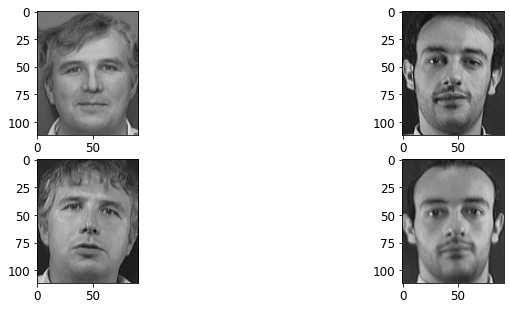

In [12]:
#lets visualize random images
delta = 5
n = np.random.randint(low=0,high=trainX.shape[0]- 2*delta,dtype=int)

#plot the faces 
plt.subplot(2,2,1)
plt.imshow(trainX[n])
plt.subplot(2,2,2)
plt.imshow(trainX[n+delta])
plt.subplot(2,2,3)
plt.imshow(trainX[n-delta])
plt.subplot(2,2,4)
plt.imshow(trainX[n+delta*2])
plt.show()

### _Split the data into train and validation dataset_

In [13]:
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(trainX,trainY,random_state=seed,test_size=test_size)

In [14]:
#shape post split of data
X_train.shape, X_valid.shape

((216, 112, 92, 3), (24, 112, 92, 3))

In [15]:
#for consitency in the variable names
X_test = testX

In [16]:
y_test = testY

In [17]:
y_train[0]

4

<a name='4'></a>
## _4 - Approach 1: Generate Embeddings using the FaceNet_
- The FaceNet model would generate embeddings per face image 
- Two images would be the same if the distance between them is less than a particular threshold or a specified value 
- The embeddings is a vector of 128 points 
- These embeddings can then be fed into a classifier model to predict the label. Support Vector Classifier is a usual choice. 
- The only challenge is to make the input compatible to the input shape required by the FaceNet model
- <b> The advantage of generating embeddings is the faster computation and when a new person's face is added to the dataset, then the entire embedding need not be generated again for the existing face. This is not directly the case when only image classification approach is exercised. In that case, the entire model would need to be retrained which does not sound like a good solution </b>


In [18]:
#load the pretrained facenet model
from keras.models import load_model
model = load_model('/kaggle/input/facenet-keras/facenet_keras.h5')
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


_In order to make use of the pre-trained facenet model, the input array needs to be resized to be compatible to the required shape of facenet as indicated by the model.inputs._ 

In [19]:
#repeat the same color channels 3 times to make the shape compatible with the facenet model
#X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
#X_valid = np.repeat(X_valid[..., np.newaxis], 3, -1)
#X_test = np.repeat(X_test[..., np.newaxis], 3, -1)

In [20]:
X_train.shape

(216, 112, 92, 3)

In [21]:
#resize the array to make it compatible with facenet. 
X_train = np.resize(X_train,(X_train.shape[0],160,160,3))
X_valid = np.resize(X_train,(X_valid.shape[0],160,160,3))
X_test = np.resize(X_train,(X_test.shape[0],160,160,3))

In [22]:
#check the new shapes after array resize
X_train.shape, X_valid.shape, X_test.shape

((216, 160, 160, 3), (24, 160, 160, 3), (160, 160, 160, 3))

In [23]:
#scale the inputs
#X_train = X_train / 255.
#X_valid = X_valid / 255.
#X_test = X_test / 255.

In [24]:
#use the pretrained model to generate the embeddings 
y_train_embeddings = model.predict(X_train)
y_valid_embeddings = model.predict(X_valid)
y_test_embeddings = model.predict(X_test)

In [25]:
#check the shape of the embeddings of the images in the training set 
y_train_embeddings.shape

(216, 128)

_It is a general practice to normalize the embeddings generated by FaceNet_

In [26]:
#apply the L2 norm on the generated embeddings using facenet model
from sklearn.preprocessing import Normalizer
input_encoder = Normalizer(norm='l2')
embed_train_norm = input_encoder.transform(np.reshape(y_train_embeddings,(-1,128)))
embed_valid_norm = input_encoder.transform(np.reshape(y_valid_embeddings,(-1,128)))
embed_test_norm = input_encoder.transform(np.reshape(y_test_embeddings,(-1,128)))

In [27]:
#check the shape post normalization 
embed_train_norm.shape

(216, 128)

<a name='4-1'></a>
### _4.1 - Use Support Vector Machines to classify the face embeddings vectors_

In [28]:
#import the needed libraries and metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
#instantiate the model 
svc_clf = SVC(kernel ='linear',C=10.0,probability=True)
#fit the model
svc_clf.fit(embed_train_norm,y_train)

SVC(C=10.0, kernel='linear', probability=True)

In [30]:
#predict the classes (faces)
y_pred_train = svc_clf.predict(embed_train_norm)
y_pred_valid = svc_clf.predict(embed_valid_norm)
y_pred_test = svc_clf.predict(embed_test_norm)

In [31]:
#check the accuracy score on the various dataset 
print('Accuracy on train set %.3f' %accuracy_score(y_train,y_pred_train))
print('Accuracy on the validation set %.3f' %accuracy_score(y_valid,y_pred_valid))
print('Accuracy on the test set %.3f' %accuracy_score(testY,y_pred_test))

Accuracy on train set 0.162
Accuracy on the validation set 0.042
Accuracy on the test set 0.069


<font color ='red'> <b> _The accuracy score on all the datasets is terrible. With the hyperparameter value of C, the model overfits to the training data and performs poorly to the valid and test data set. Adding more regularization by reducing the value of C, the model also underfits substantially to the training data.The reasons could be the distortion in the input images due to resizing and repeating the arrays to make the 4th dimension to be 3. The original dataset indicated only 1 channel._ </font> </b>



<a name='5'></a>
## _5 - Approach 2: Face Classification using the normal image classification way_
_The biggest disadvantage with this approach is that the model would need to be retrained every time the same person shows up the face to verify the person. Secondly, if a new face is added to the data set, model retraining is unavoidable. That is the biggest advantage we get using the FaceRecognition model is the embeddings which is easier to store and need not be computed for the same face again and again. if a new person comes in then the new embedding of the person can be concatenated into the list of the existing embeddings_

In [32]:
#reshape the content to the dimension as stated in the problem description
n_rows = 112
n_cols = 92
n_channels = 1

trainX =  np.reshape(data['trainX'],newshape=(data['trainX'].shape[0],n_rows,n_cols,n_channels))
testX =  np.reshape(data['testX'],newshape=(data['testX'].shape[0],n_rows,n_cols,n_channels))
trainY = data['trainY']
testY = data['testY']

In [33]:
#train the model on the entire train data after shuffling the dataset 
shuffled_indices = np.random.permutation(len(trainX))
X_train = trainX[shuffled_indices]
y_train = trainY[shuffled_indices]

In [34]:
#optional familiar variable naming 
X_test = testX
y_test = testY

In [35]:
#tensorflow
import tensorflow as tf

<a name='5-1'></a>
### _5.1 - Define the Functional API based Model Architecture_

In [36]:
def convolutional_model(input_shape,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                        kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)):
    
    '''CNN and Dense Model using Functional API'''
    
    input_img = tf.keras.Input(shape=input_shape[1:])
    #Conv2D layer
    Z1 = tf.keras.layers.Conv2D(filters=n_filters,kernel_size=(kernel_size,kernel_size),strides=strides,padding=padding)(input_img)
    ##ReLU activation layer
    A1 = tf.keras.layers.Activation(activation)(Z1)
    ##MAXPOOL
    P1 = tf.keras.layers.MaxPool2D(pool_size=(n_filters,n_filters),strides=strides*8,padding=padding)(A1)
    ##Conv2D
    Z2 = tf.keras.layers.Conv2D(filters=n_filters*2,kernel_size=(int(kernel_size/2),int(kernel_size/2)),strides=strides,padding=padding)(P1)
    ##ReLU
    A2 = tf.keras.layers.Activation(activation)(Z2)
    ##MAXPool
    P2 = tf.keras.layers.MaxPool2D(pool_size=(int(n_filters/2)),strides=strides*4,padding=padding)(A2)
    ##Flatten
    F = tf.keras.layers.Flatten()(P2)
    ##Dense layers
    D1 = tf.keras.layers.Dense(units=units,activation=activation)(F)
    D2 = tf.keras.layers.Dense(units=int(units/2),activation=activation,kernel_regularizer=kernel_regularizer)(D1)
    D3 = tf.keras.layers.Dense(units=int(units/4),activation=activation,kernel_regularizer=kernel_regularizer)(D2)
    ##output layer
    outputs = tf.keras.layers.Dense(units=20,activation='softmax')(D3)
    
    #instantiate the model
    model = tf.keras.Model(inputs=input_img,outputs=outputs)
    return model    

In [37]:
#set the shape and the regularizer to be applied
INPUT_SHAPE = (X_train.shape[0],112,92,1)
kernel_regularizer = tf.keras.regularizers.L2(l2=0.05)

#call the convolutional model 
conv_model = convolutional_model(input_shape=INPUT_SHAPE,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                                kernel_regularizer=kernel_regularizer)
#compile the model
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 92, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 92, 8)        136       
_________________________________________________________________
activation (Activation)      (None, 112, 92, 8)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 12, 16)        528       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 12, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 3, 16)          0     

<a name='5-2'></a>
### _5.2 - Define custom callback_

In [38]:
class MyQualityThreshold(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyQualityThreshold, self).__init__()
        self.cl = cl
  
    def on_epoch_end(self,epoch,logs=None):
        testScore = logs['val_accuracy']
        trainScore = logs['accuracy']

        if testScore > self.cl:
              self.model.stop_training=True

<a name='5-3'></a>
### _5.3 - Train the model_

In [39]:
#fit the model
history = conv_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),verbose=2,
                        callbacks=[MyQualityThreshold(0.92)],batch_size=32)

Epoch 1/100
8/8 - 2s - loss: 68.9109 - accuracy: 0.0292 - val_loss: 57.4217 - val_accuracy: 0.0688
Epoch 2/100
8/8 - 1s - loss: 48.4708 - accuracy: 0.1750 - val_loss: 38.7577 - val_accuracy: 0.2375
Epoch 3/100
8/8 - 1s - loss: 35.2053 - accuracy: 0.2708 - val_loss: 31.2739 - val_accuracy: 0.2688
Epoch 4/100
8/8 - 1s - loss: 29.2863 - accuracy: 0.4375 - val_loss: 26.8228 - val_accuracy: 0.4750
Epoch 5/100
8/8 - 1s - loss: 25.1867 - accuracy: 0.6750 - val_loss: 23.4986 - val_accuracy: 0.6750
Epoch 6/100
8/8 - 1s - loss: 22.2305 - accuracy: 0.8125 - val_loss: 21.1128 - val_accuracy: 0.7250
Epoch 7/100
8/8 - 1s - loss: 20.0103 - accuracy: 0.9083 - val_loss: 19.2366 - val_accuracy: 0.8687
Epoch 8/100
8/8 - 1s - loss: 18.3734 - accuracy: 0.9750 - val_loss: 17.8730 - val_accuracy: 0.8625
Epoch 9/100
8/8 - 1s - loss: 17.1719 - accuracy: 0.9833 - val_loss: 16.8293 - val_accuracy: 0.8625
Epoch 10/100
8/8 - 1s - loss: 16.1952 - accuracy: 0.9958 - val_loss: 15.9831 - val_accuracy: 0.8938
Epoch 11/

<a name='5-4'></a>
### _5.4 - Visualize Model Performance_

In [40]:
#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,68.910942,0.029167,57.421715,0.06875
1,48.470757,0.175000,38.757702,0.23750
2,35.205284,0.270833,31.273916,0.26875
3,29.286291,0.437500,26.822788,0.47500
4,25.186655,0.675000,23.498615,0.67500


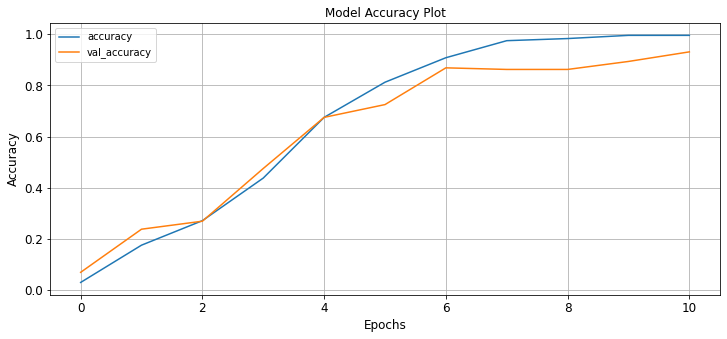

In [41]:
#plot the accuracy over the training and test set
results[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

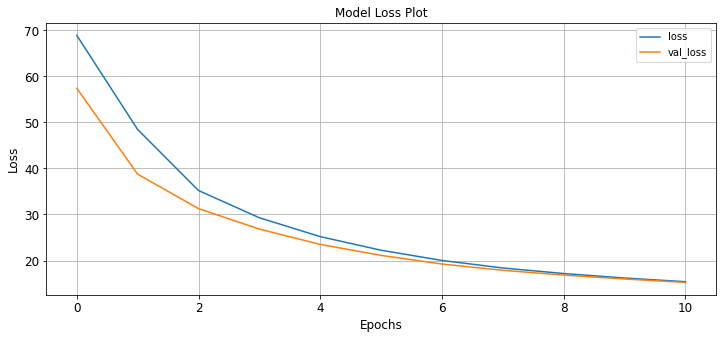

In [42]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

<a name='6'></a>
## _6 - Conclusion_
- For face recognition task, usage of detection models to generate the face embeddings is always the most preferred solution. However, data preparation for facenet model led to distortion in the image resulting in poor classification performance. 
- The current problem is solved using the image classification mechanism and without the use of any pre-trained classification model
- Functional API instead of the Sequential API used. Adding kernel regularizer to the dense layer provided a much better performance. 
- Custom callback defined as the model checkpoint. 